In [2]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, GradientBoostingRegressor, GradientBoostingClassifier, StackingRegressor, StackingClassifier
from math import sqrt
from sklearn.linear_model import LinearRegression
import xgboost
import lightgbm
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
def aim(attempt, X_train, y_train, X_test, y_test, task_type):

    max_depth = attempt.suggest_int('max_depth', 1, 15)
    min_samples_split = attempt.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = attempt.suggest_int('min_samples_leaf', 1, 10)
    
    if task_type == 'regression':
        model = DecisionTreeRegressor(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
    elif task_type == 'classification':
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    if task_type == 'regression':
        score = -mean_squared_error(y_test, y_pred)
    else:
        score = accuracy_score(y_test, y_pred)
    
    return score

# Построение дерева для регрессии

In [12]:
data_reg = pd.read_csv('1dataset.csv')
y_reg = data_reg['price']
X_reg = data_reg.drop(['price'], axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state= 42)

In [21]:
study_reg = optuna.create_study(direction='maximize')
study_reg.optimize(lambda attempt: aim(attempt, X_train_reg, y_train_reg, X_test_reg, y_test_reg, task_type='regression'), n_trials=100)

[I 2025-06-06 00:40:29,472] A new study created in memory with name: no-name-94e139ab-6b67-4186-a41c-d7cfe6cd27ac
[I 2025-06-06 00:40:29,595] Trial 0 finished with value: -129751.64825131757 and parameters: {'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 0 with value: -129751.64825131757.
[I 2025-06-06 00:40:29,725] Trial 1 finished with value: -129781.48686858712 and parameters: {'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: -129751.64825131757.
[I 2025-06-06 00:40:29,853] Trial 2 finished with value: -128088.66135111186 and parameters: {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 2 with value: -128088.66135111186.
[I 2025-06-06 00:40:29,958] Trial 3 finished with value: -132673.85478246887 and parameters: {'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 2 with value: -128088.66135111186.
[I 2025-06-06 00:40:30,083] Trial 4 finished with val

In [5]:
print(study_reg.best_value)
print(study_reg.best_params)

-126003.48573099576
{'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 7}


# Пример DecisionTreeRegressor

In [6]:
best_params_reg = study_reg.best_params
clf_exmp = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=best_params_reg['min_samples_split'],
    min_samples_leaf=best_params_reg['min_samples_leaf'],
    random_state=42
)
clf_exmp.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=7, min_samples_split=9,
                      random_state=42)

In [7]:
text_representation = tree.export_text(clf_exmp)
print(text_representation)

|--- feature_0 <= 0.14
|   |--- feature_6 <= 0.47
|   |   |--- feature_6 <= 0.44
|   |   |   |--- value: [728.84]
|   |   |--- feature_6 >  0.44
|   |   |   |--- value: [1137.02]
|   |--- feature_6 >  0.47
|   |   |--- feature_7 <= 0.09
|   |   |   |--- value: [1762.45]
|   |   |--- feature_7 >  0.09
|   |   |   |--- value: [2783.27]
|--- feature_0 >  0.14
|   |--- feature_7 <= 0.12
|   |   |--- feature_3 <= 2.50
|   |   |   |--- value: [4503.90]
|   |   |--- feature_3 >  2.50
|   |   |   |--- value: [6305.24]
|   |--- feature_7 >  0.12
|   |   |--- feature_0 <= 0.25
|   |   |   |--- value: [6601.46]
|   |   |--- feature_0 >  0.25
|   |   |   |--- value: [8158.06]



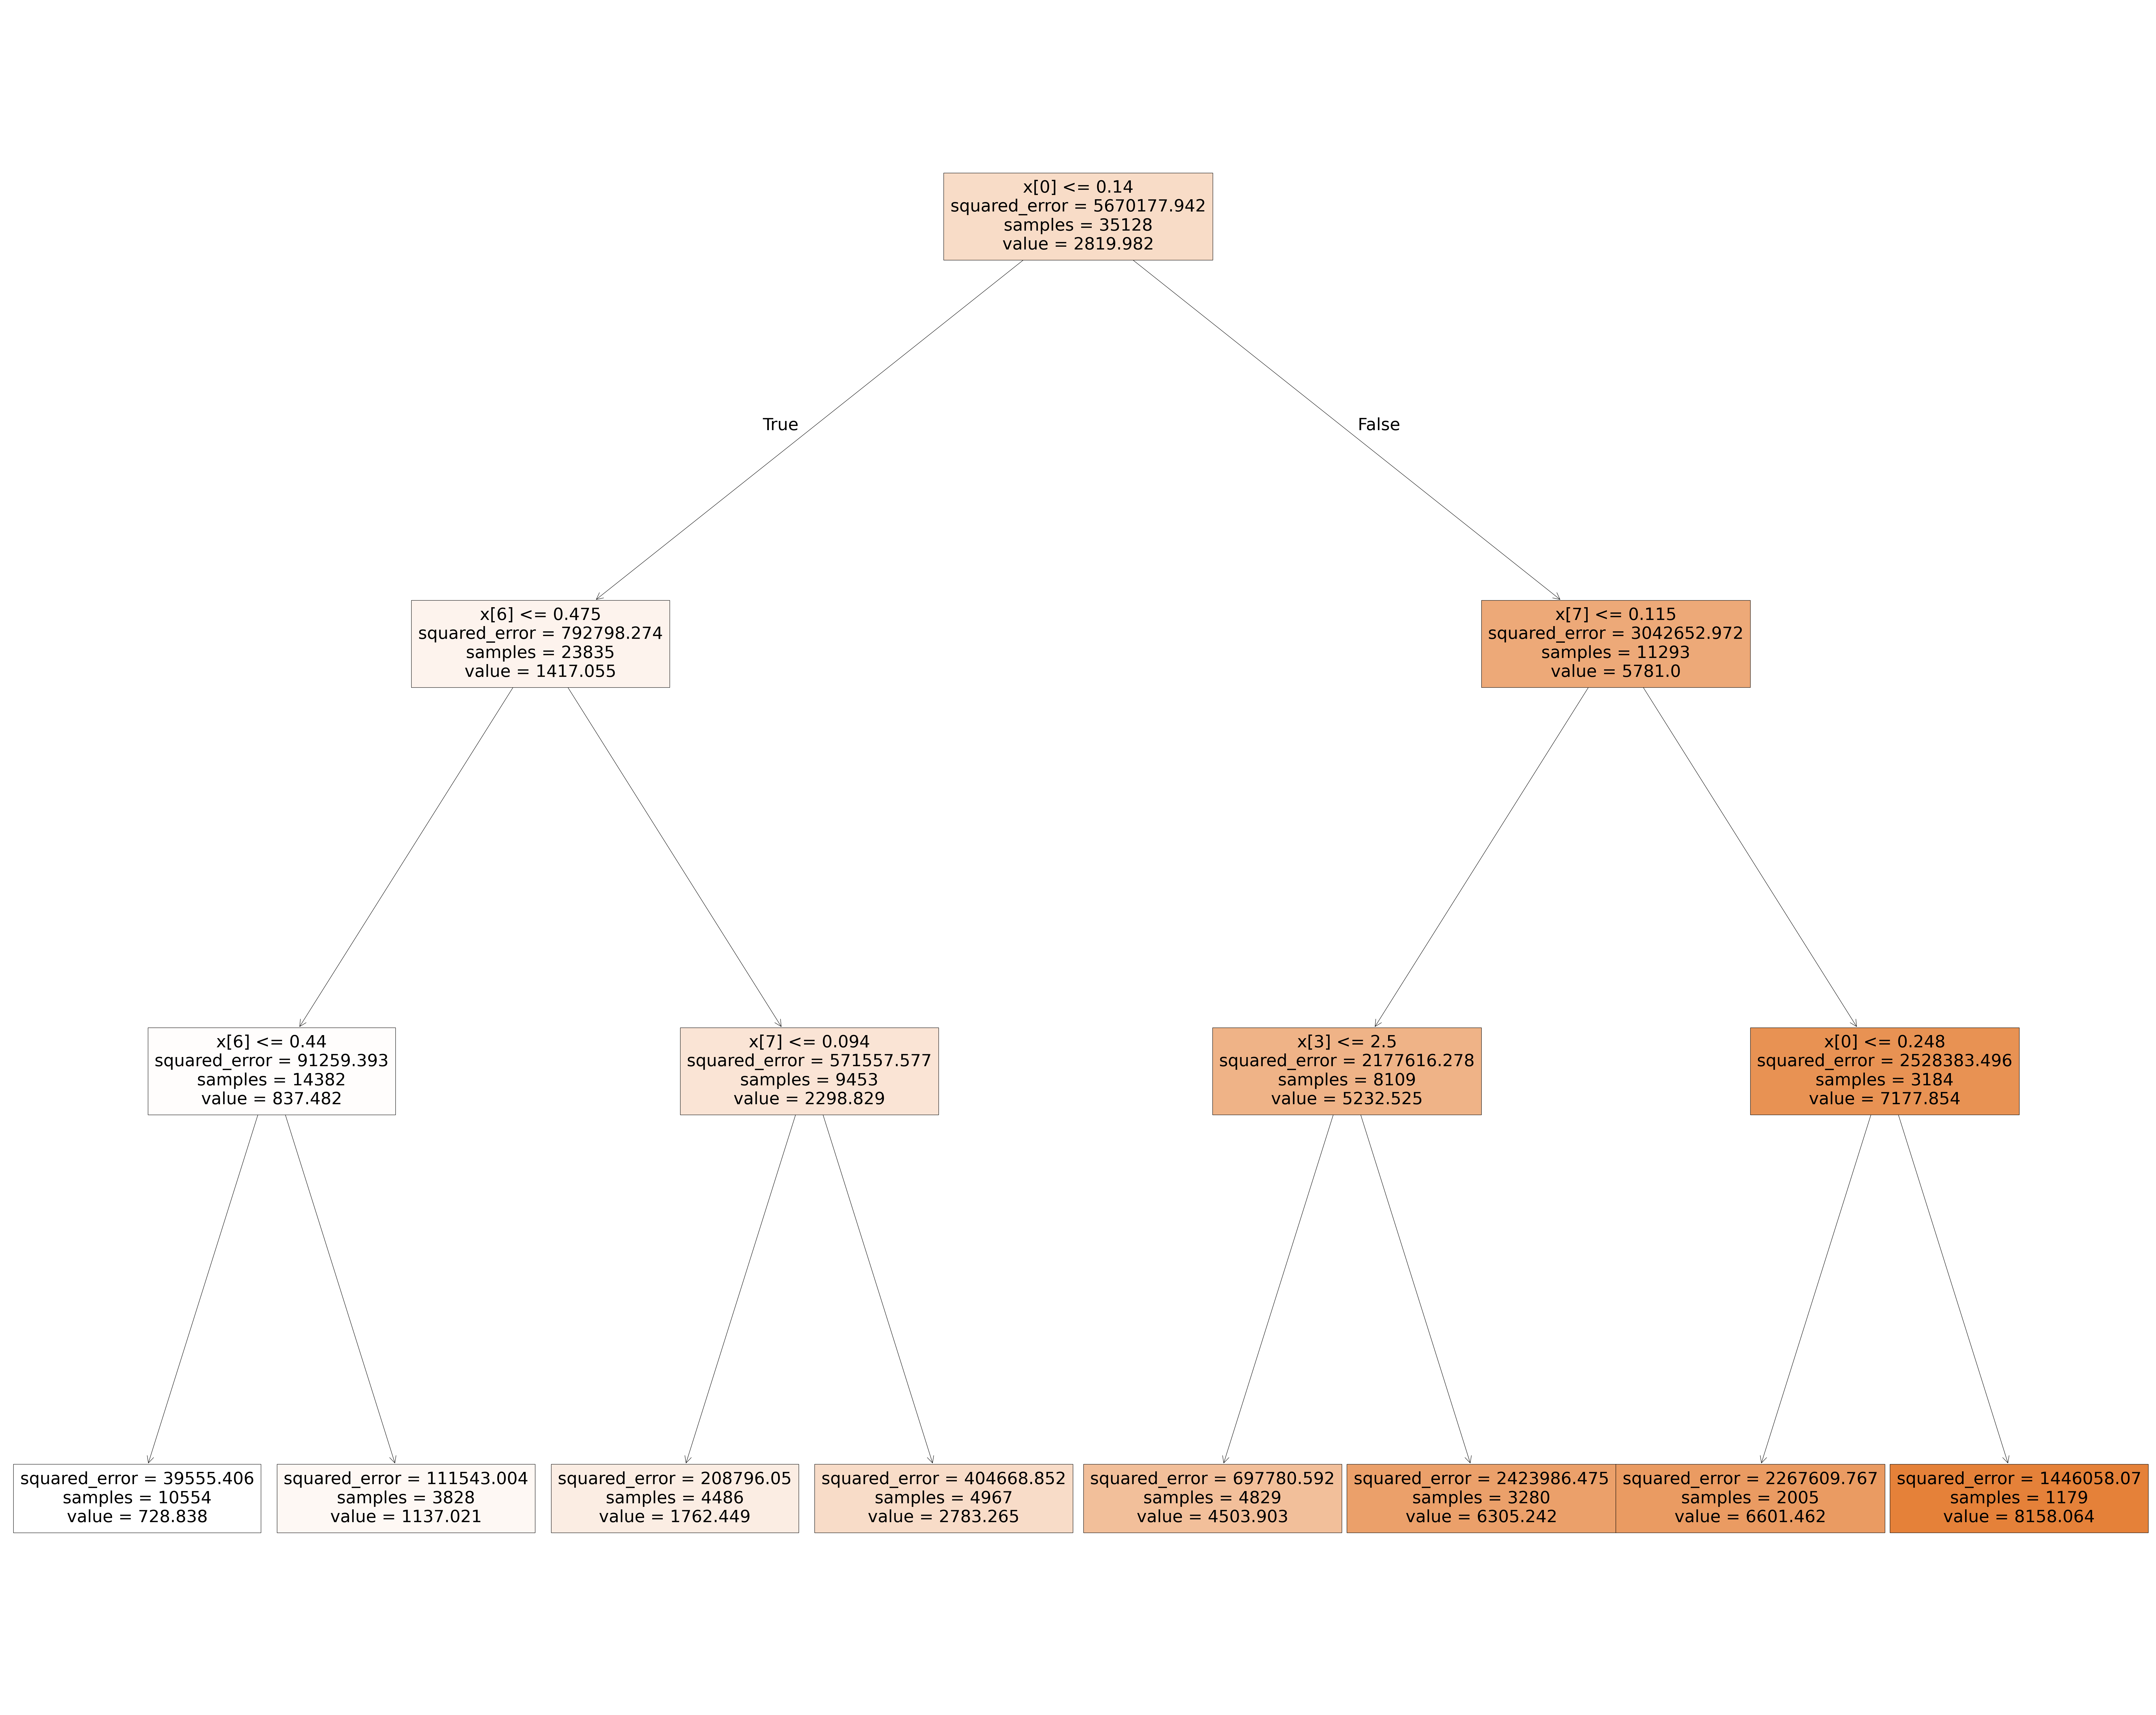

In [8]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(clf_exmp, filled=True)

In [9]:
best_params = study_reg.best_params
clf_reg = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

clf_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=7, min_samples_split=9,
                      random_state=42)

In [10]:
text_representation = tree.export_text(clf_reg)
print(text_representation)

|--- feature_0 <= 0.14
|   |--- feature_6 <= 0.47
|   |   |--- feature_6 <= 0.44
|   |   |   |--- feature_6 <= 0.41
|   |   |   |   |--- feature_3 <= 5.50
|   |   |   |   |   |--- feature_6 <= 0.40
|   |   |   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |   |   |--- feature_0 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.38
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.36
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.36
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  0.36
|   |   |   |   |   |   |   |   |   |   |   |--- value: [398.62]
|   |   |   |   |   |   |   |   |   |--- feature_6 >  0.36
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated b

## Ансамбль BaggingRegressor

Bagging — это метод ансамблевого обучения, который уменьшает дисперсию (а следствие переобучение) модели, обучая несколько независимых базовых моделей на случайных подвыборках данных и объединяя их предсказания.

Данные разбиваются на случайные подвыборки с возвращением, то есть один объект может попасть в подвыборку несколько раз, а другие могут быть исключены.

Для каждой подвыборки обучается отдельная базовая модель. Каждая модель обучается независимо от других.

In [ ]:
bagging_reg = BaggingRegressor(
    clf_reg,
    n_estimators=10,
    max_samples=0.8,
    random_state=42,
)
bagging_reg.fit(X_train_reg, y_train_reg)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=14,
                                                 min_samples_leaf=7,
                                                 min_samples_split=9,
                                                 random_state=42),
                 max_samples=0.8, n_jobs=-1, random_state=42)

In [ ]:
y_pred_reg = bagging_reg.predict(X_test_reg)

['BaggingRegressor.pkl']

In [13]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 189.4809319590603
MSE: 108755.61961746031
RMSE: 329.7811692887578
MAPE: 0.26570253252485804
R^2: 0.98


# Ансамбль GradientBoostingRegressor

Градиентный бустинг строит последовательность моделей, где каждая следующая модель исправляет ошибки предыдущих, минимизируя функцию потерь с помощью градиентного спуска.\

Начинается с инициализации простой модели. Последовательно добавляются деревья решений, каждое из которых обучается на остатках (градиентах функции потерь для регрессии среднеквадратичная ошибка, для классификации логарифмическая потеря -1/N * sum (log(Pi))) предыдущих моделей.

In [14]:
grad_boosting_regr = GradientBoostingRegressor(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
grad_boosting_regr.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(n_estimators=20, random_state=42)

In [ ]:
y_pred_reg = grad_boosting_regr.predict(X_test_reg)

['GradientBoostingRegressor.pkl']

In [16]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 439.4762918398529
MSE: 405674.41873268585
RMSE: 636.9257560600653
MAPE: 0.5126523114173768
R^2: 0.93


# Ансамбль StackingRegressor

Stacking объединяет предсказания нескольких разнородных моделей с помощью мета-модели, которая обучается на их выходах.

На первом уровне обучаются несколько базовых моделей на обучающих данных.

Предсказания базовых моделей  собираются и используются как новые признаки для обучения мета-модели (например, линейной регрессии или логистической регрессии).

In [ ]:
stacking_reg = StackingRegressor(
    estimators=[
        ('dt', clf_reg),
        ('lr', LinearRegression())],
    final_estimator=LinearRegression(),
)
stacking_reg.fit(X_train_reg, y_train_reg)

StackingRegressor(estimators=[('dt',
                               DecisionTreeRegressor(max_depth=14,
                                                     min_samples_leaf=7,
                                                     min_samples_split=9,
                                                     random_state=42)),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [ ]:
y_pred_reg = stacking_reg.predict(X_test_reg)

['StackingRegressor.pkl']

In [19]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 205.85280415767298
MSE: 123911.61227992148
RMSE: 352.01081273154307
MAPE: 0.27950747844389806
R^2: 0.98


# CatBoost Regressor

Использует градиентный бустинг с деревьями решений.

Данные случайным образом перемешиваются, чтобы избежать переобучения.

Категориальные признаки кодируются на основе целевой переменной с учетом порядка объектов, добавляя регуляризацию для сглаживания.

Поддерживает комбинации категориальных признаков, создаваемые жадным алгоритмом во время построения деревьев, что улучшает учет взаимосвязей между признаками.

Аналогично градиентному спуску и другим методам бустинга, суммируются взвешенные предсказания всех деревьев.

In [20]:
cat_boost_reg = CatBoostRegressor(iterations=100)
cat_boost_reg.fit(X_train_reg, y_train_reg)

Learning rate set to 0.467082
0:	learn: 1415.8980091	total: 136ms	remaining: 13.4s
1:	learn: 917.7369562	total: 139ms	remaining: 6.81s
2:	learn: 667.4658721	total: 142ms	remaining: 4.59s
3:	learn: 550.3134777	total: 145ms	remaining: 3.48s
4:	learn: 485.0241703	total: 149ms	remaining: 2.83s
5:	learn: 453.5310333	total: 152ms	remaining: 2.38s
6:	learn: 431.5871556	total: 155ms	remaining: 2.06s
7:	learn: 418.0531115	total: 158ms	remaining: 1.81s
8:	learn: 409.2215881	total: 162ms	remaining: 1.63s
9:	learn: 400.0506693	total: 165ms	remaining: 1.48s
10:	learn: 389.5605754	total: 168ms	remaining: 1.36s
11:	learn: 382.5548770	total: 171ms	remaining: 1.25s
12:	learn: 375.8694874	total: 173ms	remaining: 1.16s
13:	learn: 371.3348575	total: 176ms	remaining: 1.08s
14:	learn: 365.2546885	total: 180ms	remaining: 1.02s
15:	learn: 361.8933622	total: 182ms	remaining: 958ms
16:	learn: 360.4043335	total: 185ms	remaining: 904ms
17:	learn: 356.9197486	total: 188ms	remaining: 855ms
18:	learn: 354.4991324	to

In [21]:
y_pred_reg = cat_boost_reg.predict(X_test_reg)

In [22]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 182.2600903337136
MSE: 91488.84539978733
RMSE: 302.47123069771004
MAPE: 0.26794600088142034
R^2: 0.98


# XGBoost Regressor

Использует градиентный бустинг с деревьями решений, добавляя регуляризацию для предотвращения переобучения.

Оптимизирует функцию потерь с учетом градиентов, что делает обучение более точным.

Поддерживает пропущенные значения, автоматически определяя оптимальное направление для них.

In [23]:
xgb_reg = xgboost.XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
y_pred_reg = xgb_reg.predict(X_test_reg)

In [25]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 176.94879150390625
MSE: 91340.1328125
RMSE: 302.22530141022276
MAPE: 0.25417051501305116
R^2: 0.98


# LightGBM Regressor

Оптимизирована для больших датасетов и высокой скорости.

Использует гистограммный подход для разбиения признаков на интервалы, что снижает количество точек разделения и ускоряет обучение.

Деревья строятся листами, может привести к переобучению на малых датасетах.

In [26]:
lightGBM = lightgbm.LGBMRegressor(n_estimators=100)
lightGBM.fit(X_train_reg, y_train_reg)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 35128, number of used features: 10
[LightGBM] [Info] Start training from score 2819.982037


LGBMRegressor()

In [ ]:
y_pred_reg = lightGBM.predict(X_test_reg)

['lightgbmRegressor.pkl']

In [28]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 179.0162827468558
MSE: 88310.13868287212
RMSE: 297.17021836461356
MAPE: 0.269584234623306
R^2: 0.98


# Построение дерева для классификации

In [29]:
data_cls = pd.read_csv('2dataset.csv')
data_cls = data_cls.sample(frac=0.2, random_state=42)
y_cls = data_cls['RainTomorrow']
X_cls = data_cls.drop(['RainTomorrow', 'Date', 'Location'], axis=1)
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_cls, y_cls)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_balanced, test_size=0.2, random_state= 42)

In [ ]:
study_cls = optuna.create_study(direction='maximize')
study_cls.optimize(lambda attempt: aim(attempt, X_train_cls, y_train_cls, X_test_cls, y_test_cls, task_type='classification'), n_trials=100)

[I 2025-06-03 16:00:51,618] A new study created in memory with name: no-name-a22639e8-3d3c-49b4-8f2d-beaa83987e95
[I 2025-06-03 16:00:51,795] Trial 0 finished with value: 0.7921877676888813 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7921877676888813.
[I 2025-06-03 16:00:52,095] Trial 1 finished with value: 0.8259379818399863 and parameters: {'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8259379818399863.
[I 2025-06-03 16:00:52,159] Trial 2 finished with value: 0.7185197875621038 and parameters: {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.8259379818399863.
[I 2025-06-03 16:00:52,448] Trial 3 finished with value: 0.8267945862600651 and parameters: {'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.8267945862600651.
[I 2025-06-03 16:00:52,537] Trial 4 finished with value: 0.7536

In [31]:
print(study_cls.best_value)
print(study_cls.best_params)

0.833304779852664
{'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1}


# Пример DecisionTreeClassifier

In [32]:
best_params_cls = study_cls.best_params
clf_exmp = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
clf_exmp.fit(X_train_cls, y_train_cls)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, min_samples_split=9,
                       random_state=42)

In [33]:
text_representation = tree.export_text(clf_exmp)
print(text_representation)

|--- feature_12 <= -0.02
|   |--- feature_4 <= 0.09
|   |   |--- feature_14 <= 0.67
|   |   |   |--- class: True
|   |   |--- feature_14 >  0.67
|   |   |   |--- class: False
|   |--- feature_4 >  0.09
|   |   |--- feature_14 <= -0.76
|   |   |   |--- class: False
|   |   |--- feature_14 >  -0.76
|   |   |   |--- class: False
|--- feature_12 >  -0.02
|   |--- feature_2 <= -0.50
|   |   |--- feature_16 <= -0.16
|   |   |   |--- class: False
|   |   |--- feature_16 >  -0.16
|   |   |   |--- class: True
|   |--- feature_2 >  -0.50
|   |   |--- feature_2 <= 0.07
|   |   |   |--- class: True
|   |   |--- feature_2 >  0.07
|   |   |   |--- class: True



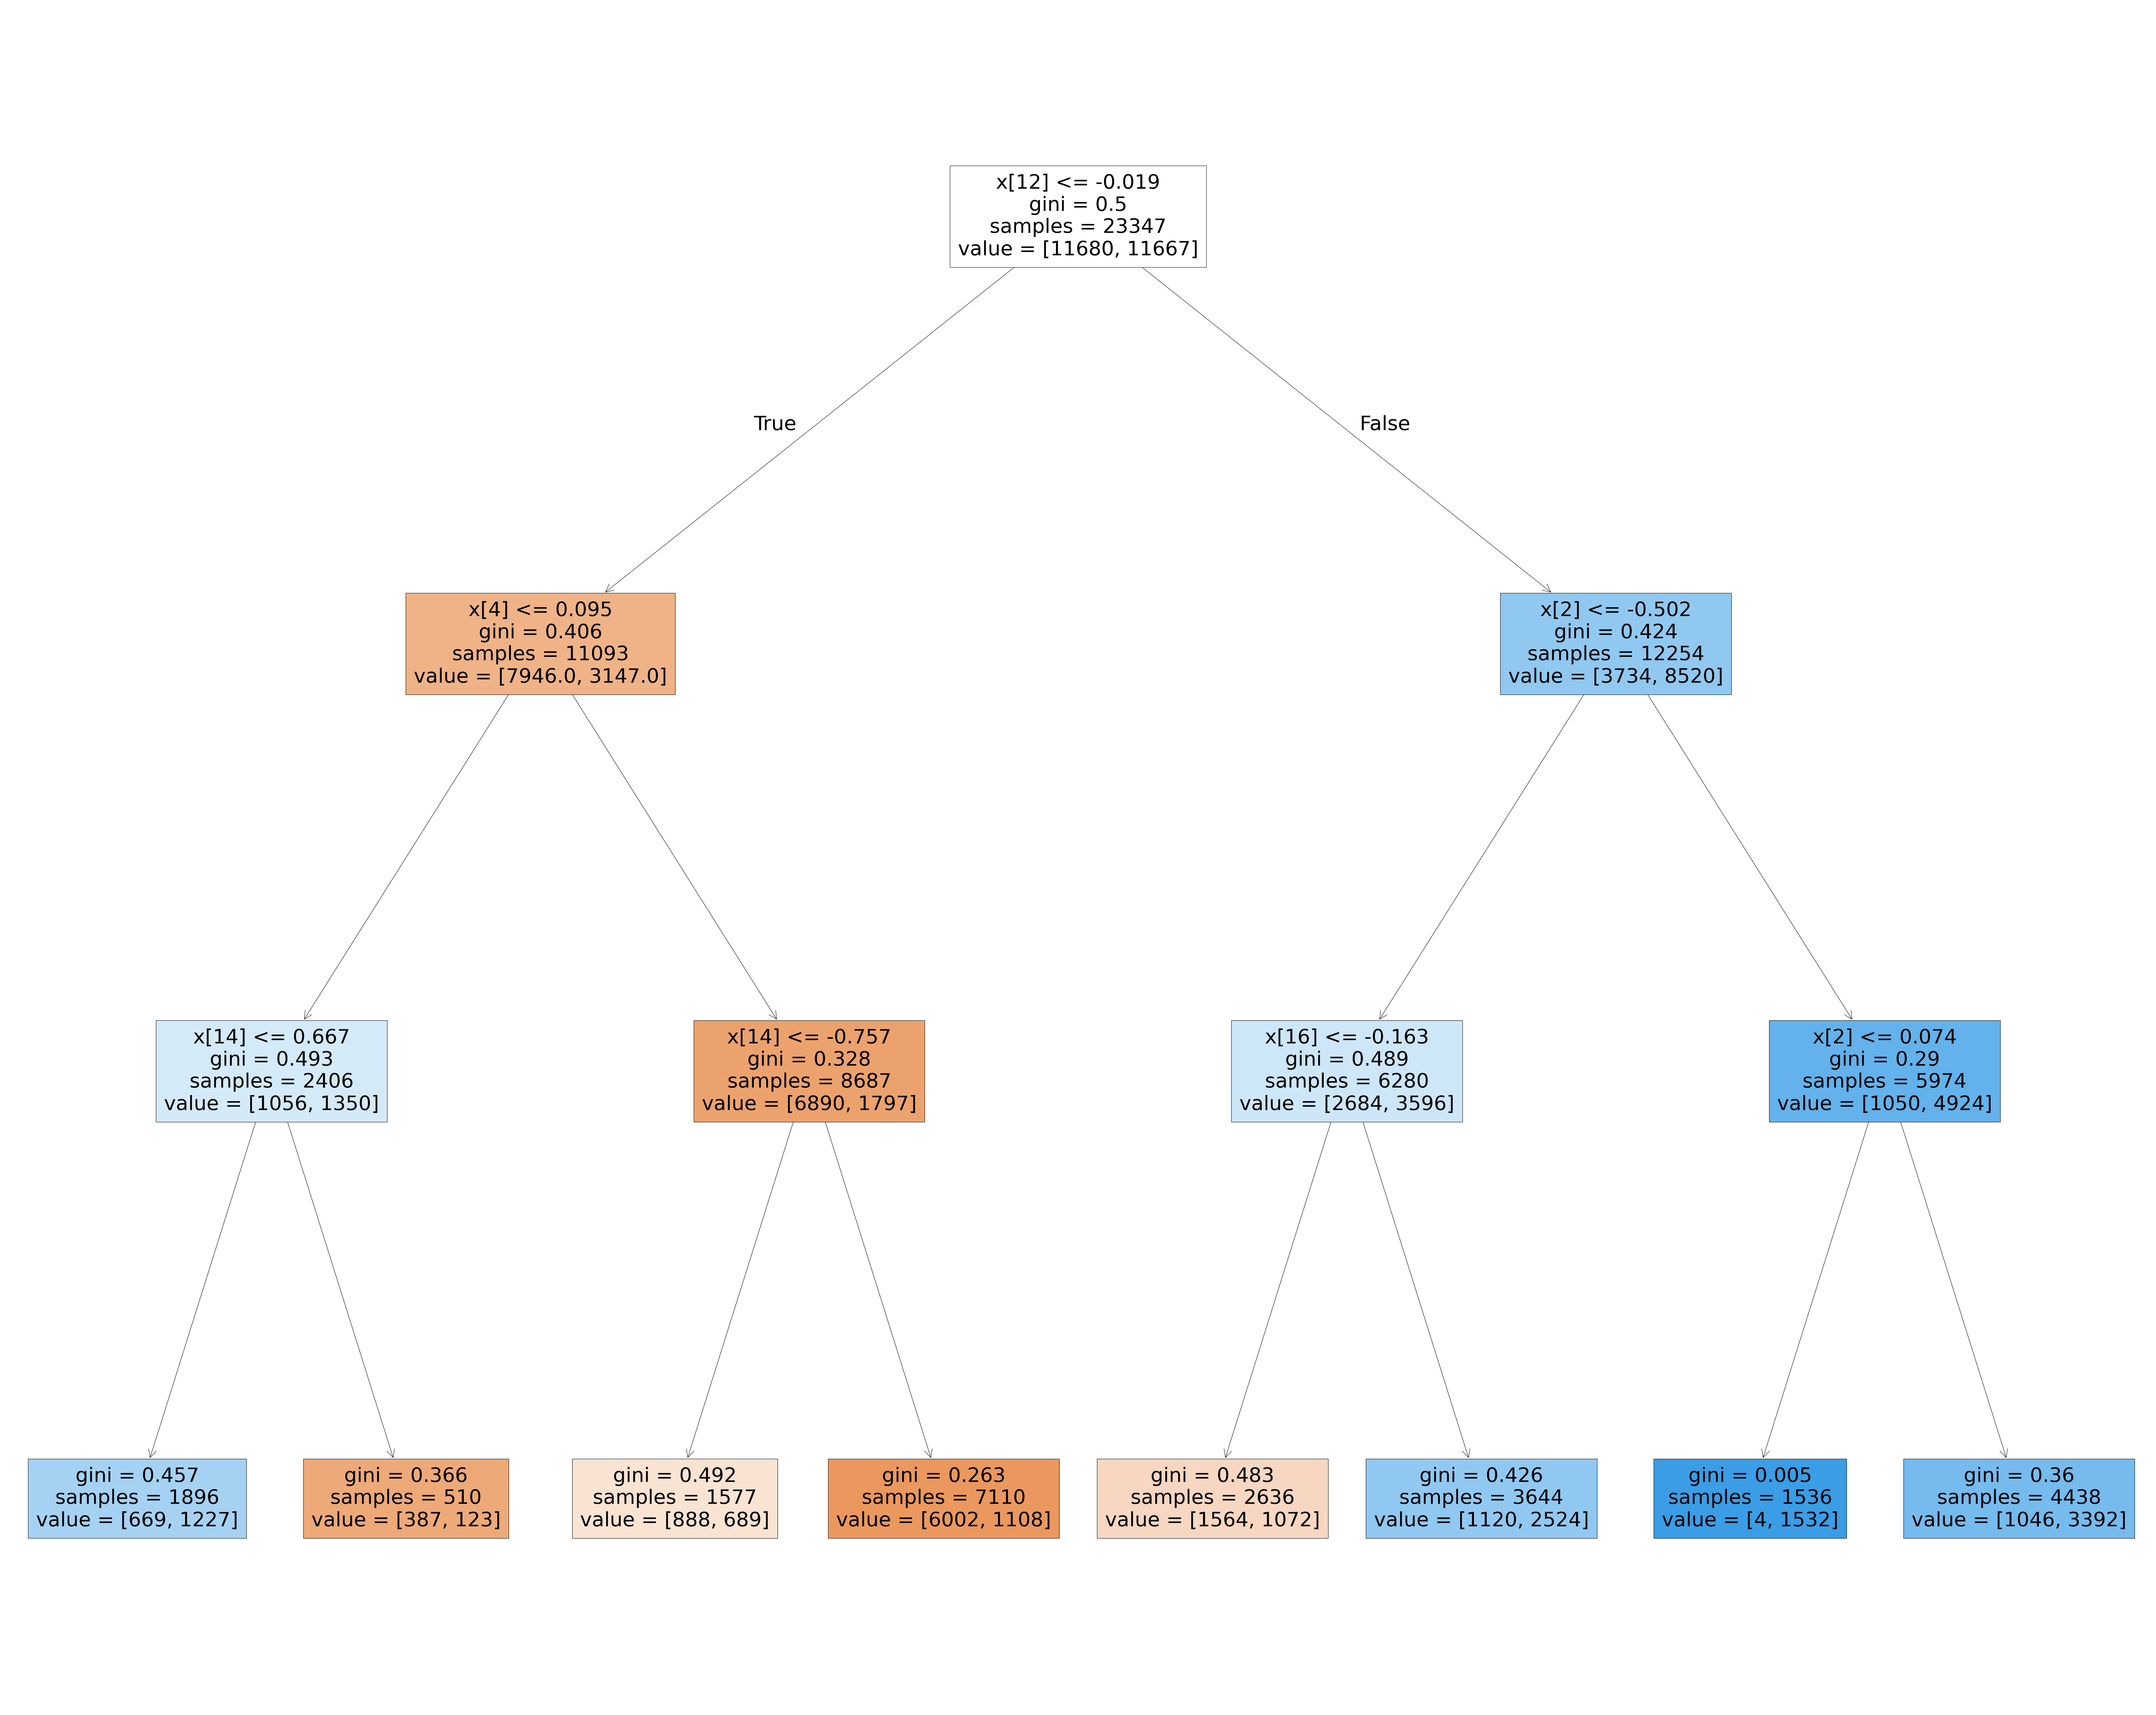

In [34]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(clf_exmp, filled=True)

In [35]:
best_params = study_cls.best_params
clf_cls = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
clf_cls.fit(X_train_cls, y_train_cls)

DecisionTreeClassifier(max_depth=15, min_samples_split=6, random_state=42)

# Ансамбль BaggingClassifier

In [36]:
bagging_cls = BaggingClassifier(
    estimator= clf_cls,
    n_estimators=50,
    max_samples=0.8,
    random_state=42
)
bagging_cls.fit(X_train_cls, y_train_cls)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=15,
                                                   min_samples_split=6,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=50, random_state=42)

In [37]:
y_pred_cls = bagging_cls.predict(X_test_cls)

In [38]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[2617  295]
 [ 359 2566]]
              precision    recall  f1-score   support

       False       0.88      0.90      0.89      2912
        True       0.90      0.88      0.89      2925

    accuracy                           0.89      5837
   macro avg       0.89      0.89      0.89      5837
weighted avg       0.89      0.89      0.89      5837



# Ансамбль GradientBoostingClassifier

In [39]:
grad_boost_cls = GradientBoostingClassifier(
    n_estimators=100
)
grad_boost_cls.fit(X_train_cls, y_train_cls)

GradientBoostingClassifier()

In [40]:
y_pred_cls = grad_boost_cls.predict(X_test_cls)

In [41]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[2602  310]
 [ 392 2533]]
              precision    recall  f1-score   support

       False       0.87      0.89      0.88      2912
        True       0.89      0.87      0.88      2925

    accuracy                           0.88      5837
   macro avg       0.88      0.88      0.88      5837
weighted avg       0.88      0.88      0.88      5837



# Ансамбль StackingClassifier

In [42]:
stacking_cls = StackingClassifier(
    estimators=[
        ('dt', clf_reg),
        ('lr', LinearRegression())],
    final_estimator=KNeighborsClassifier(),
    n_jobs=-1
)
stacking_cls.fit(X_train_cls, y_train_cls)

StackingClassifier(estimators=[('dt',
                                DecisionTreeRegressor(max_depth=14,
                                                      min_samples_leaf=7,
                                                      min_samples_split=9,
                                                      random_state=42)),
                               ('lr', LinearRegression())],
                   final_estimator=KNeighborsClassifier(), n_jobs=-1)

In [43]:
y_pred_cls = stacking_cls.predict(X_test_cls)

In [44]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[2430  482]
 [ 572 2353]]
              precision    recall  f1-score   support

       False       0.81      0.83      0.82      2912
        True       0.83      0.80      0.82      2925

    accuracy                           0.82      5837
   macro avg       0.82      0.82      0.82      5837
weighted avg       0.82      0.82      0.82      5837



# CatBoost Classifier

In [45]:
cat_boost_cls = CatBoostClassifier(iterations=100)
cat_boost_cls.fit(X_train_cls, y_train_cls, eval_set=(X_test_cls, y_test_cls), verbose=10)

Learning rate set to 0.187872
0:	learn: 0.5957266	test: 0.5949129	best: 0.5949129 (0)	total: 7.47ms	remaining: 739ms
10:	learn: 0.3924078	test: 0.3963615	best: 0.3963615 (10)	total: 68.4ms	remaining: 554ms
20:	learn: 0.3199105	test: 0.3296968	best: 0.3296968 (20)	total: 127ms	remaining: 477ms
30:	learn: 0.2848583	test: 0.2994300	best: 0.2994300 (30)	total: 186ms	remaining: 414ms
40:	learn: 0.2597749	test: 0.2770847	best: 0.2770847 (40)	total: 248ms	remaining: 357ms
50:	learn: 0.2382699	test: 0.2584508	best: 0.2584508 (50)	total: 309ms	remaining: 297ms
60:	learn: 0.2240486	test: 0.2485676	best: 0.2485676 (60)	total: 367ms	remaining: 234ms
70:	learn: 0.2123879	test: 0.2411189	best: 0.2411189 (70)	total: 427ms	remaining: 175ms
80:	learn: 0.2012576	test: 0.2345206	best: 0.2345206 (80)	total: 486ms	remaining: 114ms
90:	learn: 0.1946883	test: 0.2317120	best: 0.2317120 (90)	total: 544ms	remaining: 53.8ms
99:	learn: 0.1871530	test: 0.2280372	best: 0.2280372 (99)	total: 598ms	remaining: 0us

be

In [46]:
y_pred_cls = cat_boost_cls.predict(X_test_cls)

In [47]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[2765  147]
 [ 370 2555]]
              precision    recall  f1-score   support

       False       0.88      0.95      0.91      2912
        True       0.95      0.87      0.91      2925

    accuracy                           0.91      5837
   macro avg       0.91      0.91      0.91      5837
weighted avg       0.91      0.91      0.91      5837



# XGBoost Classifier

In [48]:
XGBoost_cls = xgboost.XGBClassifier(n_estimators=100)
XGBoost_cls.fit(X_train_cls, y_train_cls)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [49]:
y_pred_cls = XGBoost_cls.predict(X_test_cls)

In [50]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[2753  159]
 [ 334 2591]]
              precision    recall  f1-score   support

       False       0.89      0.95      0.92      2912
        True       0.94      0.89      0.91      2925

    accuracy                           0.92      5837
   macro avg       0.92      0.92      0.92      5837
weighted avg       0.92      0.92      0.92      5837



# LightGBM Classifier

In [51]:
lightGBM = lightgbm.LGBMClassifier(n_estimators=100)
lightGBM.fit(X_train_cls, y_train_cls)

[LightGBM] [Info] Number of positive: 11667, number of negative: 11680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4394
[LightGBM] [Info] Number of data points in the train set: 23347, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499722 -> initscore=-0.001114
[LightGBM] [Info] Start training from score -0.001114


LGBMClassifier()

In [52]:
y_pred_cls = lightGBM.predict(X_test_cls)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [53]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[2762  150]
 [ 349 2576]]
              precision    recall  f1-score   support

       False       0.89      0.95      0.92      2912
        True       0.94      0.88      0.91      2925

    accuracy                           0.91      5837
   macro avg       0.92      0.91      0.91      5837
weighted avg       0.92      0.91      0.91      5837



# Кастомная реализация CART

In [ ]:
class Terminal_Point:
    def __init__(self, index=None, threshold=None, left=None, right=None, value=None):
        self.index = index
        self.threshold = threshold
        self.left = left          
        self.right = right        
        self.value = value 

def gini(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

def mse(y):
    return np.mean((y - np.mean(y)) ** 2)

def stop_recursion_clf(y):
    values, counts = np.unique(y, return_counts=True)
    return Terminal_Point(value=values[np.argmax(counts)])

def stop_recursion_reg(y):
    return Terminal_Point(value=np.mean(y))

stop_functions = {
    "classification": lambda y: stop_recursion_clf(y),
    "regression": lambda y: stop_recursion_reg(y)
}

class DecisionTree:
    def __init__(self, task, max_depth=None, min_samples_split=2):
        self.root = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        
        self.stop_function = {
            "classification": lambda y: stop_recursion_clf(y),
            "regression": lambda y: stop_recursion_reg(y)
        }[task]

        self.gain = {
            "classification": lambda y, left_idx, right_idx:  gini(y) - (len(y[left_idx])/len(y) * gini(y[left_idx]) + len(y[right_idx])/len(y) * gini(y[right_idx])),
            "regression": lambda y, left_idx, right_idx: mse(y) - (len(y[left_idx])/len(y) * mse(y[left_idx]) + len(y[right_idx])/len(y) * mse(y[right_idx]))
        }[task]

        self.stop_no_split = {
            "classification": lambda y: y[0],
            "regression": lambda y: np.mean(y)
        }[task]
    
    def _best_split(self, X, y):
        best_gain = -np.inf
        best_index, best_threshold = None, None

        for index in range(X.shape[1]):
            thresholds = np.unique(X[:, index])
            for threshold in thresholds:
                left_idx = X[:, index] <= threshold
                right_idx = X[:, index] > threshold
                
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue

                gain = self.gain(y, left_idx, right_idx)

                if gain > best_gain:
                    best_gain = gain
                    best_index = index
                    best_threshold = threshold

        return best_index, best_threshold

    def _build_tree(self, X, y, depth=0):

        if (self.max_depth and depth >= self.max_depth) or len(y) < self.min_samples_split:
            return self.stop_function(y)

        index, threshold = self._best_split(X, y)

        if index is None:
            return Terminal_Point(value=self.stop_no_split(y))

        left_idx = X[:, index] <= threshold
        right_idx = X[:, index] > threshold

        left = self._build_tree(X[left_idx], y[left_idx], depth+1)
        right = self._build_tree(X[right_idx], y[right_idx], depth+1)

        return Terminal_Point(index, threshold, left, right)
    
    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _predict_sample(self, x, Terminal_Point):
        if Terminal_Point.value is not None:
            return Terminal_Point.value
        if x[Terminal_Point.index] <= Terminal_Point.threshold:
            return self._predict_sample(x, Terminal_Point.left)
        else:
            return self._predict_sample(x, Terminal_Point.right)
    
    def predict(self, X):
        return np.array([self._predict_sample(x, self.root) for x in X])

In [55]:
dtc = DecisionTree(task='classification', max_depth=5)
dtc.fit(X_train_cls, y_train_cls)
y_pred = dtc.predict(X_test_cls)

In [56]:
print(confusion_matrix(y_test_cls, y_pred))
print(classification_report(y_test_cls, y_pred))

[[2218  694]
 [ 616 2309]]
              precision    recall  f1-score   support

       False       0.78      0.76      0.77      2912
        True       0.77      0.79      0.78      2925

    accuracy                           0.78      5837
   macro avg       0.78      0.78      0.78      5837
weighted avg       0.78      0.78      0.78      5837



In [57]:
dtc = DecisionTree(task='regression', max_depth=5)
dtc.fit(X_train_reg.values, y_train_reg.values)
y_pred = dtc.predict(X_test_reg.values)

In [58]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred),2)}')

MAE: 358.6916834793469
MSE: 314811.5468504371
RMSE: 561.0806954890153
MAPE: 0.38989940567401343
R^2: 0.94


Вывод по регрессии:

Лучшая модель XGBoost Regressor.
XGBoost показывает наименьший MAE (177.03), что важно для минимизации средней ошибки предсказания, и близкие к лучшим значения MSE и RMSE. Модель наиболее сбалансирована по точности и устойчивости. LightGBM Regressor также демонстрирует отличные результаты (минимальные MSE и RMSE), но XGBoost выигрывает за счет меньшего MAE. CatBoost близок, но слегка уступает по всем метрикам.

Вывод по Классификации:

Лучшая модель XGBoost Classifier.
XGBoost демонстрирует лучший F1-score (0.51) и наивысший recall (0.40) для True. CatBoost и LightGBM показывают сопоставимые результаты (accuracy 0.88 и F1-score 0.49–0.50), но XGBoost выигрывает за счет лучшего recall, что делает его предпочтительным для задач, где важна идентификация положительного класса.